# Sigmoid - Logistic Function 

## Math behind it
---

**Sigmoid Function**

The sigmoid (logistic) activation function squashes any real value input into the range (0, 1). It's defined as: 

$$
\sigma (x) = \frac{1}{1+ e^{-x}}
$$

Advantages: 
- Output range of (0, 1) makes it ideal for probability-like outputs 
- Smooth and differentiable everywhere

Disadvantages: 
- Vanishing gradient problem, where for large $ |x| $ the sigmoid function saturates sending its derivative to zero, causing the gradient to shrink as it propagates backward across layers 
- Ouputs are not zero-centered, leading to slower convergence as opposed to something like tanh

<br><br>
**Derivative of Sigmoid**

The derivative is used during backpropagation to compute gradients which are used to update weights

$$
\frac{d}{dx} \sigma(x) = \sigma(x)(1 - \sigma(x))
$$


<br><br>
**Taylor Series Expansion of $e^x$**

The sigmoid function utilizes the exponential term $ e^{-x} $, so it is useful for us to approximate the exponential functoin ($e^x$) with the following Taylor (Maclaurin) series expansion:

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

note:  
The infinite series converges for all $x$, however for practicality we use just a partial sum where accuracy grows as more taylor series terms are computed, but at the expense of performance

## Code
---

In [76]:
class Sigmoid: 
    def __init__(self):
        pass

    def __call__(self, x):
        return 1 / (1 + self._exp(-x))
    
    def _exp(self, x, terms=35):
        result = 1.0
        factorial = 1 
        power = 1 

        for n in range(1, terms):
            factorial *= n 
            power *= x 
            result += power / factorial 
        return result 

    def derivative(self, x):
        s = self.__call__(x)
        return s * ( 1 - s)
            

## Testing
---

### Imports

In [77]:
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Test Sigmoid Output and Plot Function 

========== Testing ===========
Testing Sigmoid:
  x = -10 -> Sigmoid(x) = 0.00004540, Expected ≈ 0.00004540  |  Sigmoid'(x) = 0.00004540
  x =  -1 -> Sigmoid(x) = 0.26894142, Expected ≈ 0.26890000  |  Sigmoid'(x) = 0.19661193
  x =   0 -> Sigmoid(x) = 0.50000000, Expected ≈ 0.50000000  |  Sigmoid'(x) = 0.25000000
  x =   1 -> Sigmoid(x) = 0.73105858, Expected ≈ 0.73100000  |  Sigmoid'(x) = 0.19661193
  x =  10 -> Sigmoid(x) = 0.99994704, Expected ≈ 0.99990000  |  Sigmoid'(x) = 0.00005296

====== Plotting Sigmoid ======


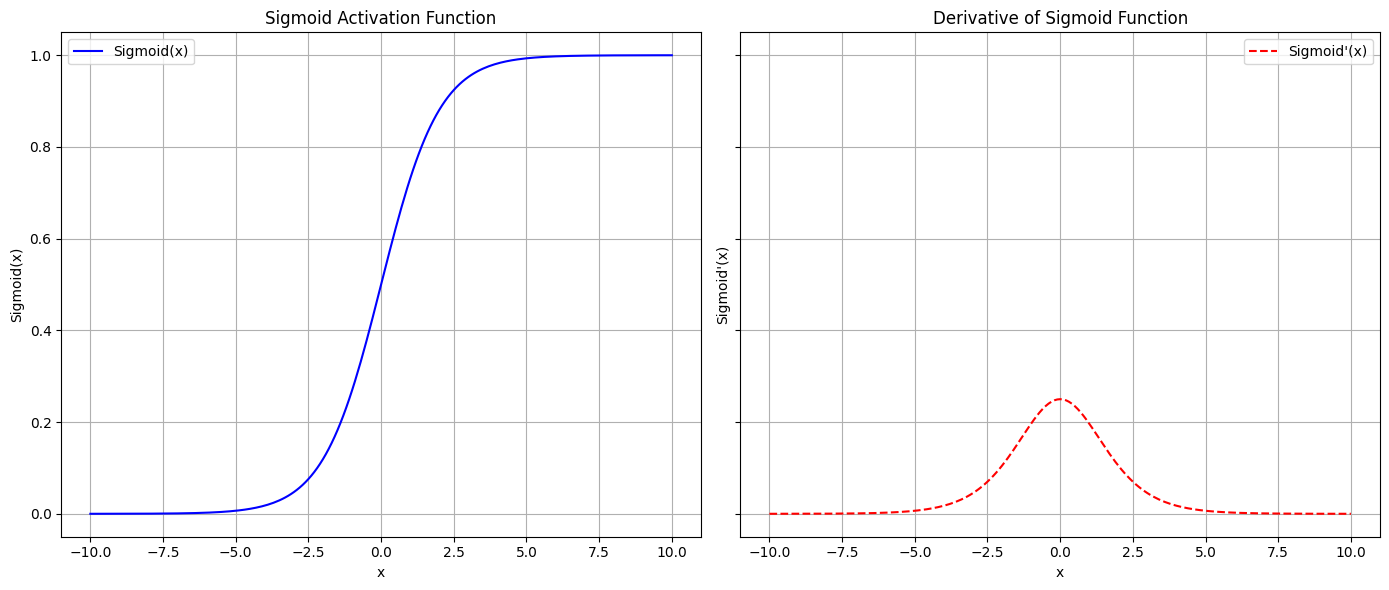

In [ ]:
import matplotlib.pyplot as plt

# intialize Sigmoid
sigmoid = Sigmoid()


# Test values
test_inputs = [-10, -1, 0, 1, 10]
expected_output = [4.5398e-5, 0.2689, 0.5000, 0.7310, 0.9999] # approx values based on computing sigmoid with a calculator

print(" Testing ".center(30, "="))
print("Testing Sigmoid:")
for i in range(len(test_inputs)):
    x = test_inputs[i]
    y = sigmoid(x)
    dy = sigmoid.derivative(x)
    print(f"  x = {x:>3} -> Sigmoid(x) = {y:>10.8f}, Expected ≈ {expected_output[i]:>10.8f}  |  Sigmoid'(x) = {dy:>10.8f}")



# Plot
print()
print(" Plotting Sigmoid ".center(30, "="))

x_values = [x * 0.1 for x in range(-100, 101)]  # From -10 to 10 with step 0.1
sigmoid_values = [sigmoid(x) for x in x_values]
sigmoid_derivative_values = [sigmoid.derivative(x) for x in x_values]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Sigmoid function
axs[0].plot(x_values, sigmoid_values, label="Sigmoid(x)", color='blue')
axs[0].set_title("Sigmoid Activation Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Sigmoid(x)")
axs[0].grid(True)
axs[0].legend()

# Plot Sigmoid derivative
axs[1].plot(x_values, sigmoid_derivative_values, label="Sigmoid'(x)", color='red', linestyle='dashed')
axs[1].set_title("Derivative of Sigmoid Function")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Sigmoid'(x)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()